## waste Management using CNN model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [3]:
# importing libraries related to tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [4]:
# visualisation
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
    data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:16<00:00, 617.01it/s]


In [5]:
data.shape

(22564, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

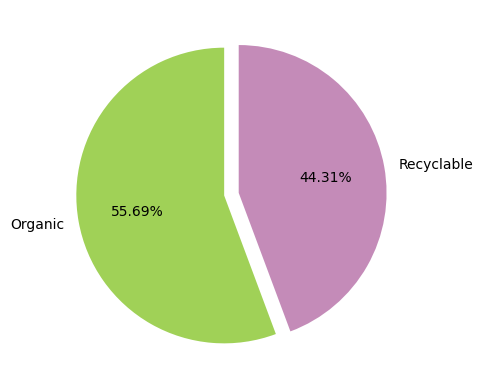

In [6]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle= 90, explode=[0.05, 0.05])
plt.show

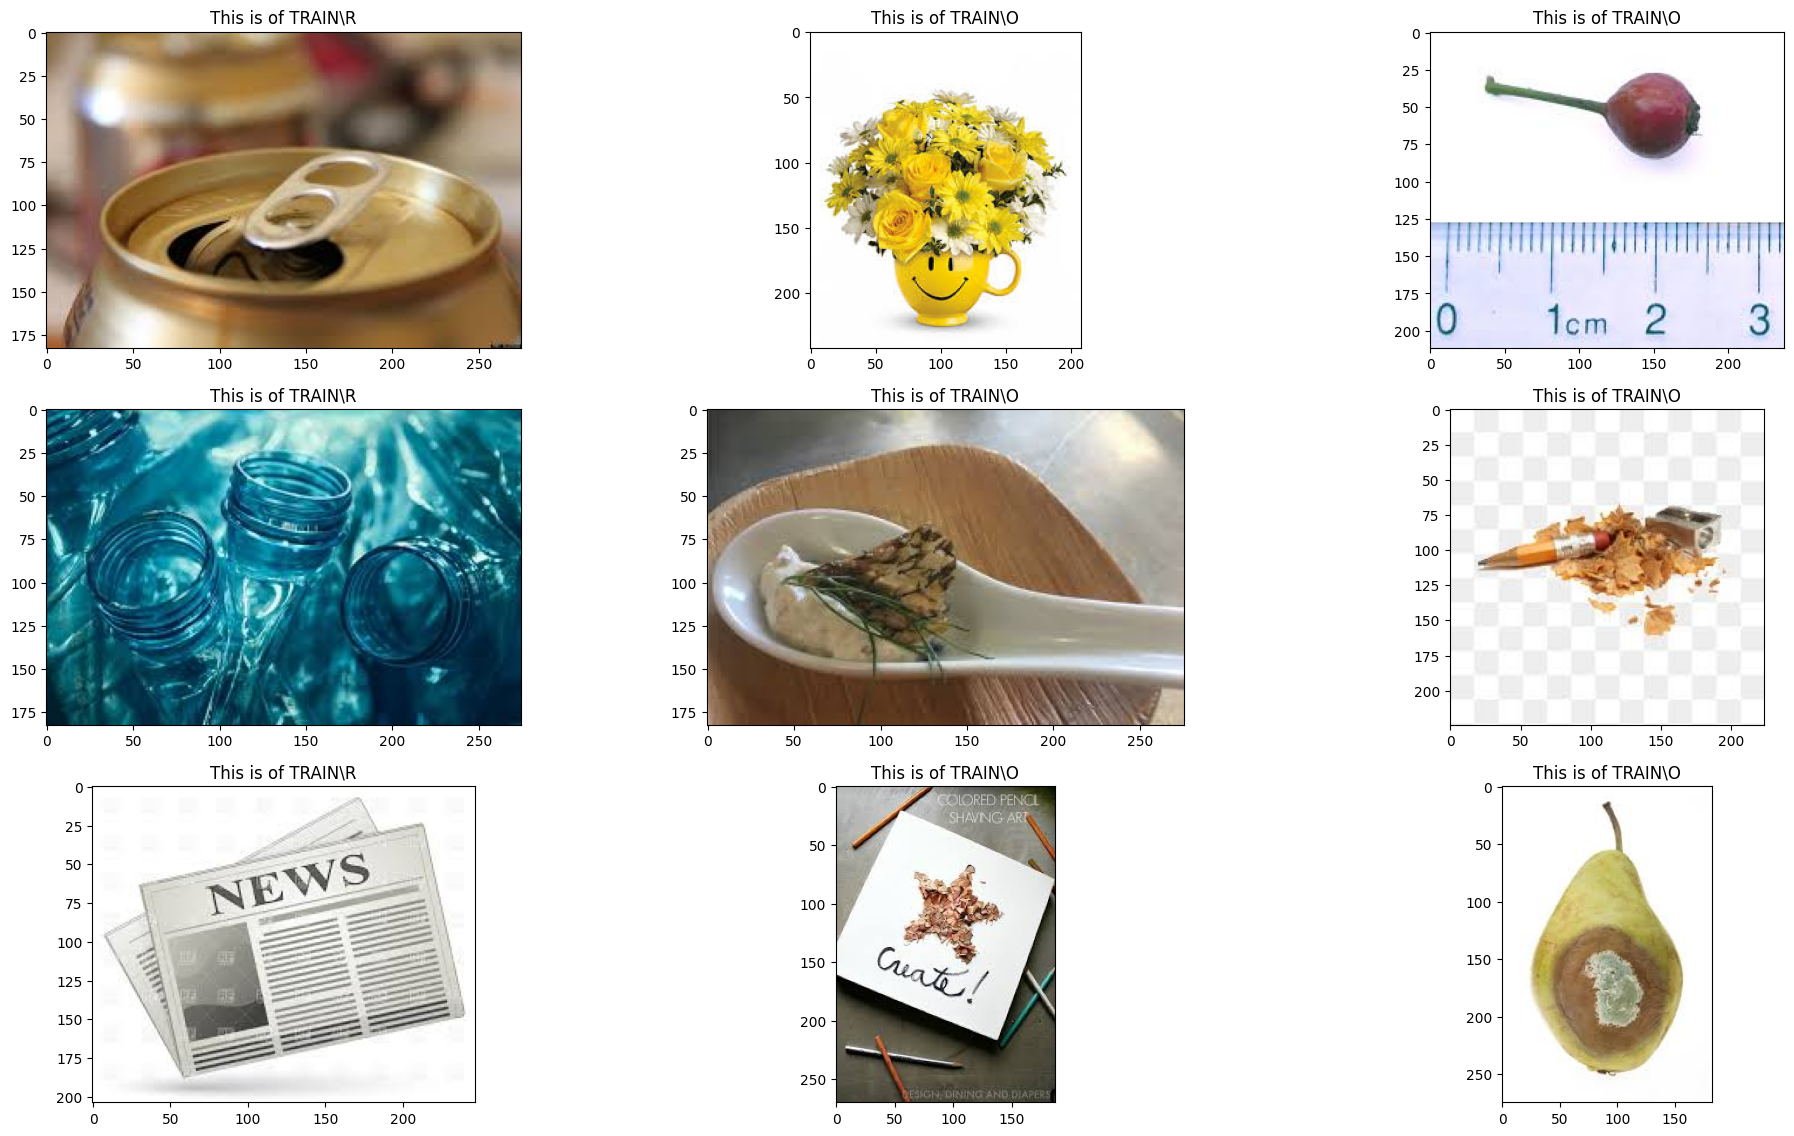

In [7]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN- convolution neural network

In [8]:
model = Sequential()
model.add(Conv2D(32,(3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile( loss= "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [13]:
hist = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1146s 13s/step - accuracy: 0.8515 - loss: 0.3705 - val_accuracy: 0.8802 - val_loss: 0.3156
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1122s 13s/step - accuracy: 0.8627 - loss: 0.3502 - val_accuracy: 0.8922 - val_loss: 0.2695
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1112s 12s/step - accuracy: 0.8721 - loss: 0.3313 - val_accuracy: 0.9057 - val_loss: 0.2441
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1120s 13s/step - accuracy: 0.8823 - loss: 0.2967 - val_accuracy: 0.8552 - val_loss: 0.3328
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1129s 13s/step - accuracy: 0.8945 - loss: 0.2734 - val_accuracy: 0.8926 - val_loss: 0.2622
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1118s 13s/step - accuracy: 0.9050 - loss: 0.2473 - val_accuracy: 0.8727 - val_loss: 0.3029
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1111s 12s/step - accuracy: 0.9171 - loss: 0.2208 - val_accuracy: 0.8977 - val_loss: 0.2978
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1120s 13s/step - accuracy: 0.9310 - loss: 0.1874 - val_accu

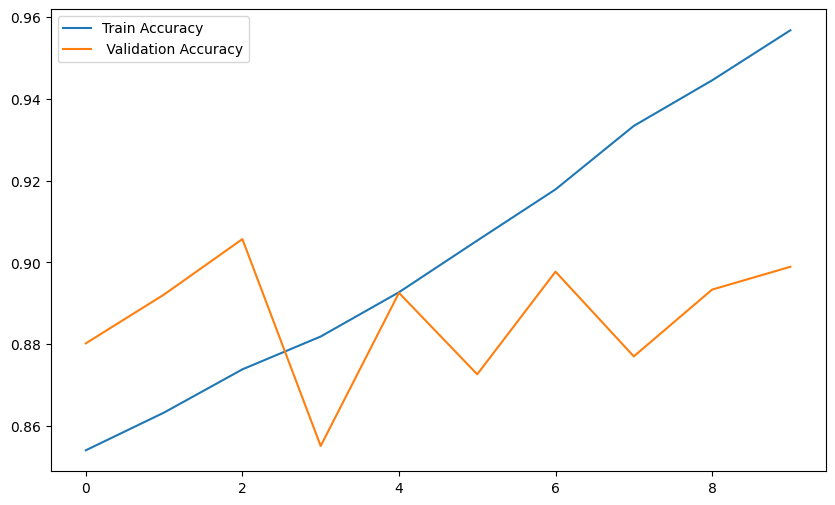

In [14]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

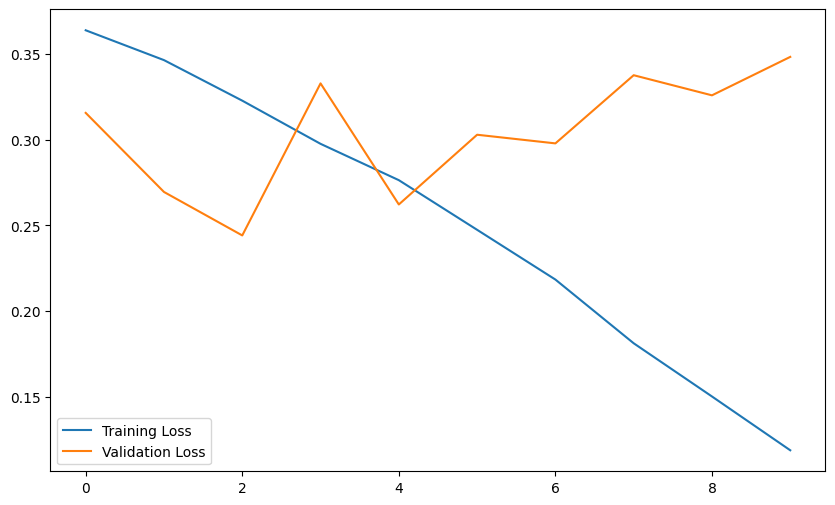

In [15]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [16]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img)) 
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
The image shown is Organic Waste


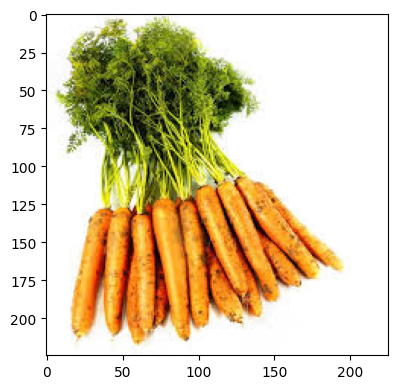

In [24]:
test_img = cv2.imread('\\Users\joelj\OneDrive\Desktop\waste classification\dataset\TEST\O\O_12595.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
The image shown is Organic Waste


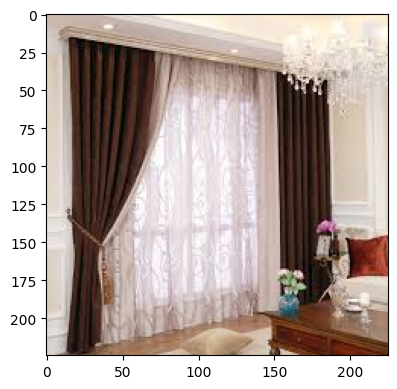

In [25]:
test_img = cv2.imread('\\Users\joelj\OneDrive\Desktop\waste classification\dataset\TEST\R\R_10031.jpg')
predict_fun(test_img)